In [2]:
import bct

import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
mat_path = r"../../BCT/BCT/2019_03_03_BCT/data_and_demos/fve30.mat"

In [4]:
mat_json = scipy.io.loadmat(mat_path)
mat_json

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Jun 29 16:29:22 2007',
 '__version__': '1.0',
 '__globals__': [],
 'Names': array(['  V1', '  V2', '  V3', '  VP', ' V3a', '  V4', ' VOT', ' V4t',
        '  MT', ' FST', 'PITd', 'PITv', 'CITd', 'CITv', 'AITd', 'AITv',
        'STPp', 'STPa', '  TF', '  TH', 'MSTd', 'MSTl', '  PO', ' PIP',
        ' LIP', ' VIP', '  DP', '  7a', ' FEF', '  46'], dtype='<U4'),
 'CIJ': array([[0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
         1, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
         1, 1, 0, 1, 0, 0, 1, 0],
        [1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
         1, 1, 1, 1, 0, 0, 1, 0],
        [0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
         1, 1, 0, 1, 0, 0, 1, 0],
        [1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
         1, 0, 0, 0, 1, 0, 1, 0],
        [1, 1, 

In [4]:
mat_dict = {k:v for k, v in mat_json.items() if k[0] != '_'}
mat_dict

{'Names': array(['  V1', '  V2', '  V3', '  VP', ' V3a', '  V4', ' VOT', ' V4t',
        '  MT', ' FST', 'PITd', 'PITv', 'CITd', 'CITv', 'AITd', 'AITv',
        'STPp', 'STPa', '  TF', '  TH', 'MSTd', 'MSTl', '  PO', ' PIP',
        ' LIP', ' VIP', '  DP', '  7a', ' FEF', '  46'], dtype='<U4'),
 'CIJ': array([[0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
         1, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
         1, 1, 0, 1, 0, 0, 1, 0],
        [1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
         1, 1, 1, 1, 0, 0, 1, 0],
        [0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
         1, 1, 0, 1, 0, 0, 1, 0],
        [1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
         1, 0, 0, 0, 1, 0, 1, 0],
        [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
         0, 1, 1, 0, 1, 0, 1, 1],
        [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1

In [5]:
mat_dict.keys()

dict_keys(['Names', 'CIJ'])

In [6]:
for key in mat_dict.keys():
    print(mat_dict[key].shape, mat_dict[key].ndim)

(30,) 1
(30, 30) 2


In [7]:
mat_dict['CIJ'].diagonal()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

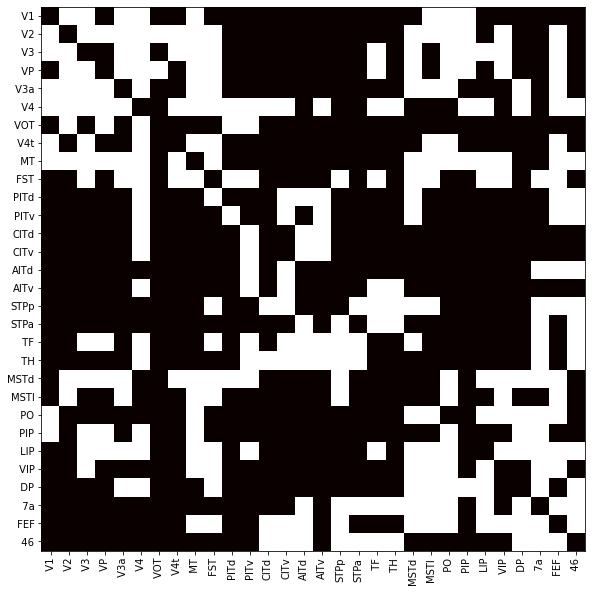

In [8]:
fig = plt.figure(figsize=(10, 10))

plt.imshow(mat_dict['CIJ'], cmap='hot')
plt.xticks(range(len(mat_dict['CIJ'])), mat_dict['Names'], rotation='vertical')
plt.yticks(range(len(mat_dict['CIJ'])), mat_dict['Names'])
plt.show()

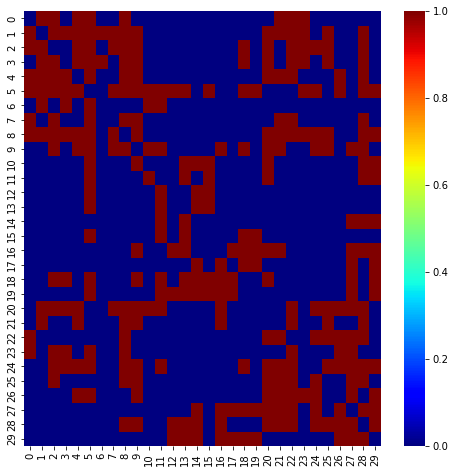

In [9]:
fig = plt.figure(figsize=(8, 8))
ax = sns.heatmap(mat_dict['CIJ'], cmap='jet')
plt.show()

In [10]:
import networkx as nx

In [11]:
G = nx.from_numpy_array(mat_dict['CIJ'])
G.edges(data=True)

EdgeDataView([(0, 1, {'weight': 1}), (0, 2, {'weight': 1}), (0, 4, {'weight': 1}), (0, 5, {'weight': 1}), (0, 8, {'weight': 1}), (0, 21, {'weight': 1}), (0, 22, {'weight': 1}), (0, 23, {'weight': 1}), (0, 7, {'weight': 1}), (1, 2, {'weight': 1}), (1, 3, {'weight': 1}), (1, 4, {'weight': 1}), (1, 5, {'weight': 1}), (1, 6, {'weight': 1}), (1, 7, {'weight': 1}), (1, 8, {'weight': 1}), (1, 9, {'weight': 1}), (1, 20, {'weight': 1}), (1, 21, {'weight': 1}), (1, 22, {'weight': 1}), (1, 23, {'weight': 1}), (1, 25, {'weight': 1}), (1, 28, {'weight': 1}), (2, 4, {'weight': 1}), (2, 5, {'weight': 1}), (2, 7, {'weight': 1}), (2, 8, {'weight': 1}), (2, 9, {'weight': 1}), (2, 18, {'weight': 1}), (2, 20, {'weight': 1}), (2, 22, {'weight': 1}), (2, 23, {'weight': 1}), (2, 24, {'weight': 1}), (2, 25, {'weight': 1}), (2, 28, {'weight': 1}), (2, 3, {'weight': 1}), (3, 4, {'weight': 1}), (3, 5, {'weight': 1}), (3, 6, {'weight': 1}), (3, 8, {'weight': 1}), (3, 9, {'weight': 1}), (3, 18, {'weight': 1}), (3,

In [12]:
node_labels = {idx: mat_dict['Names'][idx] for idx in range(len(mat_dict['CIJ']))}
node_labels

{0: '  V1',
 1: '  V2',
 2: '  V3',
 3: '  VP',
 4: ' V3a',
 5: '  V4',
 6: ' VOT',
 7: ' V4t',
 8: '  MT',
 9: ' FST',
 10: 'PITd',
 11: 'PITv',
 12: 'CITd',
 13: 'CITv',
 14: 'AITd',
 15: 'AITv',
 16: 'STPp',
 17: 'STPa',
 18: '  TF',
 19: '  TH',
 20: 'MSTd',
 21: 'MSTl',
 22: '  PO',
 23: ' PIP',
 24: ' LIP',
 25: ' VIP',
 26: '  DP',
 27: '  7a',
 28: ' FEF',
 29: '  46'}

[drawing documentation](https://networkx.org/documentation/stable/reference/drawing.html)

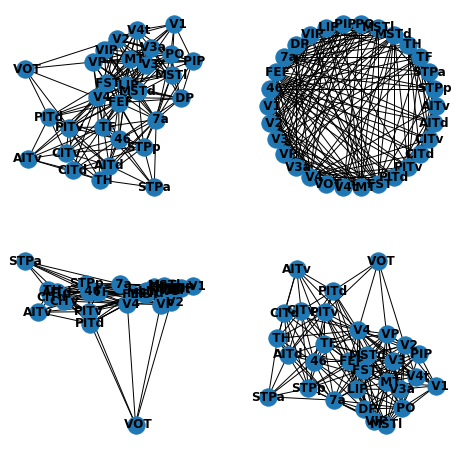

In [25]:
fig = plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
nx.draw(G, labels=node_labels, with_labels=True, font_weight='bold')

plt.subplot(2, 2, 2)
nx.draw_shell(G, labels=node_labels, with_labels=True, font_weight='bold')

plt.subplot(2, 2, 3)
nx.draw_spectral(G, labels=node_labels, with_labels=True, font_weight='bold')

plt.subplot(2, 2, 4)
nx.draw_spring(G, labels=node_labels, with_labels=True, font_weight='bold')

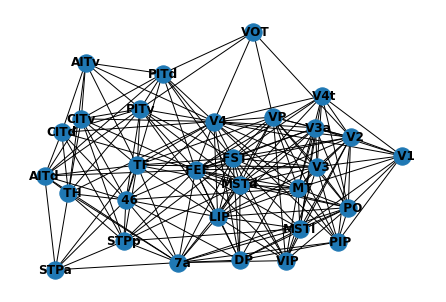

In [16]:
nx.draw_kamada_kawai(G, labels=node_labels, with_labels=True, font_weight='bold')

In [24]:
list(G.adjacency())

[(0,
  {1: {'weight': 1},
   2: {'weight': 1},
   4: {'weight': 1},
   5: {'weight': 1},
   8: {'weight': 1},
   21: {'weight': 1},
   22: {'weight': 1},
   23: {'weight': 1},
   7: {'weight': 1}}),
 (1,
  {0: {'weight': 1},
   2: {'weight': 1},
   3: {'weight': 1},
   4: {'weight': 1},
   5: {'weight': 1},
   6: {'weight': 1},
   7: {'weight': 1},
   8: {'weight': 1},
   9: {'weight': 1},
   20: {'weight': 1},
   21: {'weight': 1},
   22: {'weight': 1},
   23: {'weight': 1},
   25: {'weight': 1},
   28: {'weight': 1}}),
 (2,
  {0: {'weight': 1},
   1: {'weight': 1},
   4: {'weight': 1},
   5: {'weight': 1},
   7: {'weight': 1},
   8: {'weight': 1},
   9: {'weight': 1},
   18: {'weight': 1},
   20: {'weight': 1},
   22: {'weight': 1},
   23: {'weight': 1},
   24: {'weight': 1},
   25: {'weight': 1},
   28: {'weight': 1},
   3: {'weight': 1}}),
 (3,
  {1: {'weight': 1},
   2: {'weight': 1},
   4: {'weight': 1},
   5: {'weight': 1},
   6: {'weight': 1},
   8: {'weight': 1},
   9: {'weigh

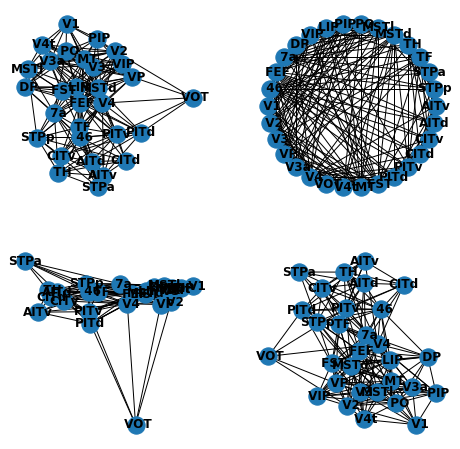

In [26]:
H = nx.relabel_nodes(G, node_labels)

fig = plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
nx.draw(H, with_labels=True, font_weight='bold')

plt.subplot(2, 2, 2)
nx.draw_shell(H, with_labels=True, font_weight='bold')

plt.subplot(2, 2, 3)
nx.draw_spectral(H, with_labels=True, font_weight='bold')

plt.subplot(2, 2, 4)
nx.draw_spring(H, with_labels=True, font_weight='bold')

In [27]:
list(H.adjacency())

[('  V1',
  {'  V2': {'weight': 1},
   '  V3': {'weight': 1},
   ' V3a': {'weight': 1},
   '  V4': {'weight': 1},
   '  MT': {'weight': 1},
   'MSTl': {'weight': 1},
   '  PO': {'weight': 1},
   ' PIP': {'weight': 1},
   ' V4t': {'weight': 1}}),
 ('  V2',
  {'  V1': {'weight': 1},
   '  V3': {'weight': 1},
   '  VP': {'weight': 1},
   ' V3a': {'weight': 1},
   '  V4': {'weight': 1},
   ' VOT': {'weight': 1},
   ' V4t': {'weight': 1},
   '  MT': {'weight': 1},
   ' FST': {'weight': 1},
   'MSTd': {'weight': 1},
   'MSTl': {'weight': 1},
   '  PO': {'weight': 1},
   ' PIP': {'weight': 1},
   ' VIP': {'weight': 1},
   ' FEF': {'weight': 1}}),
 ('  V3',
  {'  V1': {'weight': 1},
   '  V2': {'weight': 1},
   ' V3a': {'weight': 1},
   '  V4': {'weight': 1},
   ' V4t': {'weight': 1},
   '  MT': {'weight': 1},
   ' FST': {'weight': 1},
   '  TF': {'weight': 1},
   'MSTd': {'weight': 1},
   '  PO': {'weight': 1},
   ' PIP': {'weight': 1},
   ' LIP': {'weight': 1},
   ' VIP': {'weight': 1},
   '